This code is under MIT license. See the License.txt file.

## Loading the libraries and dependencies

In [1]:
## Libraries ##
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import time as libtime
import seaborn as sns; sns.set()
from decimal import Decimal
import gc
plt.style.use('default')

## Home made code
from Main import *                        
from Numerical_functions import *         ## Few helpful functions
from Constants import *                   ## All the constants (env. and traits)

## Computing the abiotic equilibrium

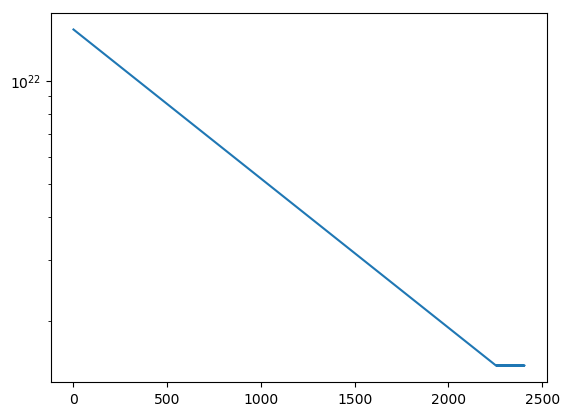

801.24276752435253

In [2]:
HatmT = [ntot*7.634e-3]
time  = 1e11
HatmT = Run_abio(HatmT,time)
plt.semilogy(np.array(HatmT))
plt.show()
HatmT[len(HatmT)-1]/ntot*1e6

## Bio.-Atm. coupling

In [24]:
bio_tmax    = 360/12                     

t           = 0
dt          = 0.0025
Hatm        = HatmT[len(HatmT)-1]     #mol
Gatm        = ntot*1e-20      #mol
COatm       = ntot*1e-5      #mol
Catm        = ntot*2.5*1e-3   #mol
imax        = 1000

HatmT       = [Hatm]     
GatmT       = [Gatm]     
COatmT      = [COatm]     
time_atm    = [t]
FH_vec      = []
FG_vec      = []
NPP_vec     = []
    
for i in np.arange(1,imax+1):

    Hinf       = Hatm/ntot * 7.8e-4    # mol.L-1           Kharecha
    Cinf       = 2.5*1e-3 * 1 * 1e-3      # mol.L-1           Kharecha
    Ninf       = 1e-8                     # mol.L-1           arbitrary
    Ginf       = Gatm/ntot * 1.4e-3    # mol.L-1           Kharecha
    
    starters = [rc,Vc,Qc,ks,qmax,mg,kd,mort,thresh,slope,gmax]
    Env = [Hinf,Cinf,Ninf,Ginf,QH,QC,QN,QG]
    init = [Hinf,Cinf,Ninf,1E-10,0,1e7,thresh]
    NCT,XT,HT,CT,NT,GT,XoT,D,time,NPPT = Run_Profile(init,starters,Env,tmax=bio_tmax,T=T,dt = dt)
    NCT  = np.array(NCT)
    XT   = np.array(XT)
    HT   = np.array(HT)
    CT   = np.array(CT)
    NT   = np.array(NT)
    GT   = np.array(GT)
    XoT  = np.array(XoT)
    D    = np.array(D)
    time = np.array(time)
    FH   = -QH*(Hinf-np.mean(HT[-1000:]))*365*1e-2*1e3
    FG   = -QG*(Ginf-np.mean(GT[-1000:]))*365*1e-2*1e3
    NPP  = np.mean(NPPT[-1000:])*365*1e3*S
    
    FH_vec.append(FH)
    FG_vec.append(FG)
    NPP_vec.append(NPP)
    
    HatmT,GatmT,COatmT,time_atm = Run_atm(HatmT,GatmT,COatmT,time_atm,FH,FG)
        
    Hatm  = HatmT[len(HatmT)-1]
    Gatm  = GatmT[len(GatmT)-1]
    COatm = COatmT[len(COatmT)-1]

    print("Progress => {:2.1%}".format(i/imax), end="\r")

In [8]:
HatmT   = np.array(HatmT)   
GatmT   = np.array(GatmT)     
COatmT  = np.array(COatmT)     

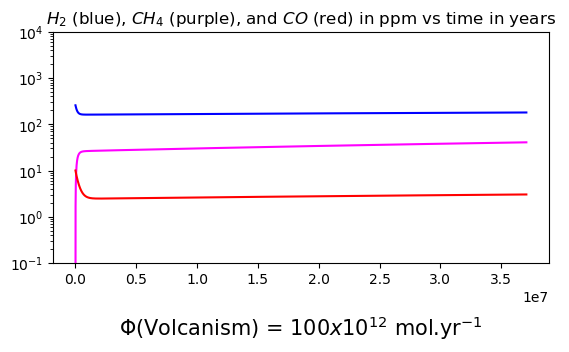

In [12]:
fig, ax = plt.subplots(1,1,sharex=False)

ax.semilogy(time_atm,HatmT/ntot/1e-6,color='blue')
ax.set_title('$H_2$ (blue), $CH_4$ (purple), and $CO$ (red) in ppm vs time in years')
ax.set_ylim([1E-1,1E4])
ax.semilogy(time_atm,GatmT/ntot/1e-6,color='magenta')
ax.semilogy(time_atm,COatmT/ntot/1e-6,color='red')

fig.set_figheight(3)
#fig.add_subplot(111, frameon=False)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.xlabel('$\Phi$(Volcanism) = $100x10^{12}$ mol.yr$^{-1}$',labelpad=20,fontsize=15)

plt.show()

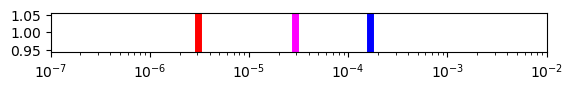

3.0925837565038556e-06

In [10]:
fig, ax = plt.subplots(1,1,sharex=False)

ax.semilogx([np.array(np.mean(HatmT[-1000:])/ntot),np.array(np.mean(GatmT[-1000:])/ntot),np.array(np.mean(COatmT[-1000:])/ntot)],[1,1,1],'.',ms=0.1)
ax.axvline(x=np.array(np.mean(HatmT[-1000:])/ntot),linewidth=5.0,color='blue')
ax.axvline(x=np.array(np.mean(GatmT[-1000:])/ntot),linewidth=5.0,color='magenta')
ax.axvline(x=np.array(np.mean(COatmT[-1000:])/ntot),linewidth=5.0,color='red')
ax.set_xlim([1e-7,1e-2])

fig.set_figheight(0.5)

plt.show()
np.mean(COatmT[-1000:])/ntot

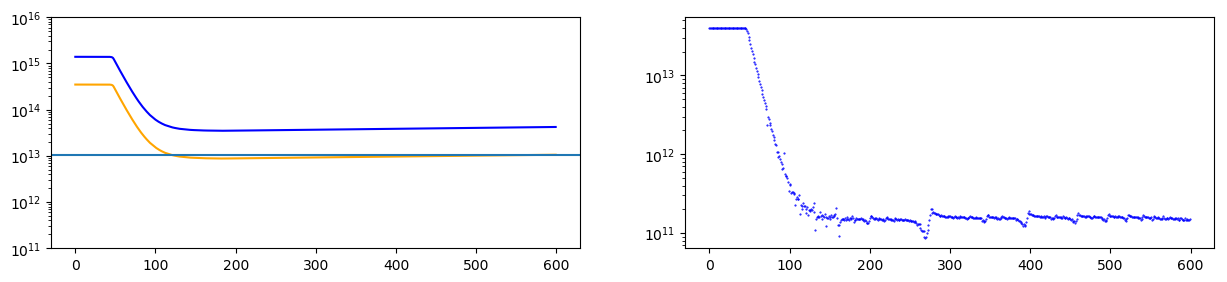

In [21]:
fig, ax = plt.subplots(1,2,sharex=False)

ax[0].semilogy(abs(np.array(FH_vec)*S),color='blue')
ax[0].semilogy(abs(np.array(FG_vec)*S),color='orange')
ax[0].axhline(y=np.mean(FG_vec[-10:])*S)
ax[0].set_ylim([1E11,1E16])

ax[1].semilogy(abs(np.array(NPP_vec)),'.',ms=1,color='blue')

fig.set_figwidth(15)
fig.set_figheight(3)

plt.show()

In [9]:
np.array(FG_vec[-10:])*S

array([  5.12652804e+12,   5.20269650e+12,   5.14939228e+12,
         5.15048854e+12,   5.15991979e+12,   5.14877754e+12,
         5.18840271e+12,   5.13527171e+12,   5.26341772e+12,
         5.13764068e+12])

In [14]:
np.mean(abs(np.array(NPP_vec[-10:])))

148312489468.60825

In [11]:
6.95e10/Av*(60*60*24*360)*S

18374688000000.0

In [12]:
(6.95e10/Av*(60*60*24*360)*S) / (np.mean(FG_vec[-10:])*S)

2.1402039380071383